# Exploratory Data Analysis - Retail
<img src="retail.png">

### Importing Important Libraries

In [3]:
!pip install plotly
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 23.9 MB 4.5 MB/s eta 0:00:01


### Importing Dataset

In [4]:
df=pd.read_csv('SampleSuperstore.csv')

### Viewing Dataset

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Data Preprocessing

In [11]:
df.duplicated().sum() #Finding duplicate values in dataset

17

In [12]:
df.drop_duplicates(subset=None,keep='first',inplace=True) #Removing duplicate values from dataset
df.duplicated().sum()

0

In [15]:
df = df.drop(['Postal Code'],axis = 1)  

### Data Visualization

In [17]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

### Different Categories of Sales

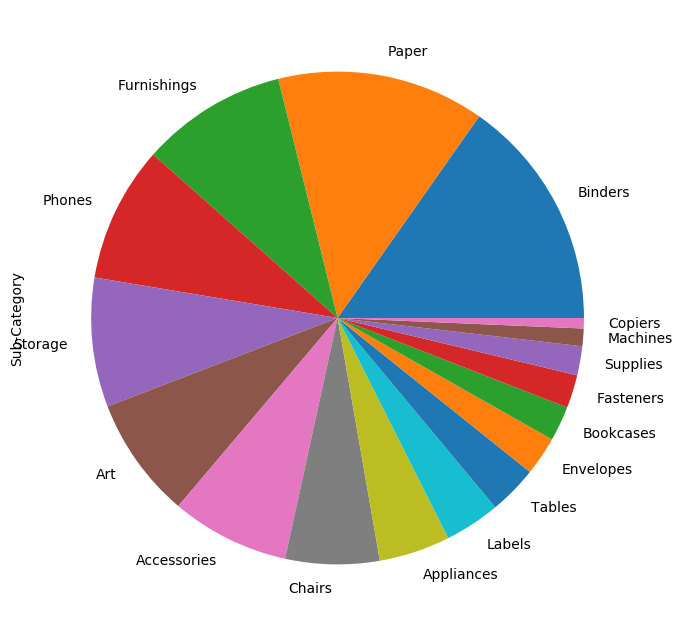

In [40]:
plt.figure(figsize=(8,8))
df['Sub-Category'].value_counts().plot.pie()
plt.show()

Copiers & Machines have the lowest sales whereas Binders & papers have the highest sales

### State wise Sales

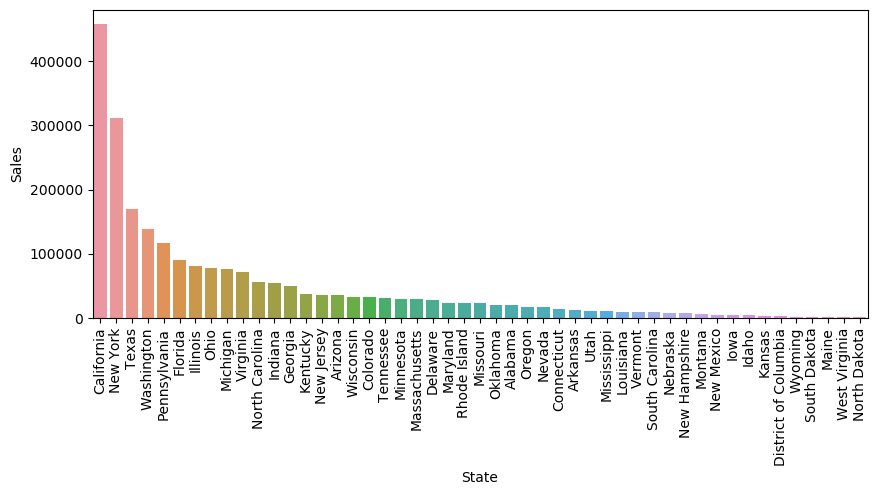

In [30]:
data_state= df.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(10,4))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

California & Newyork states have highest sales

### State-wise Profit/Loss in Sales

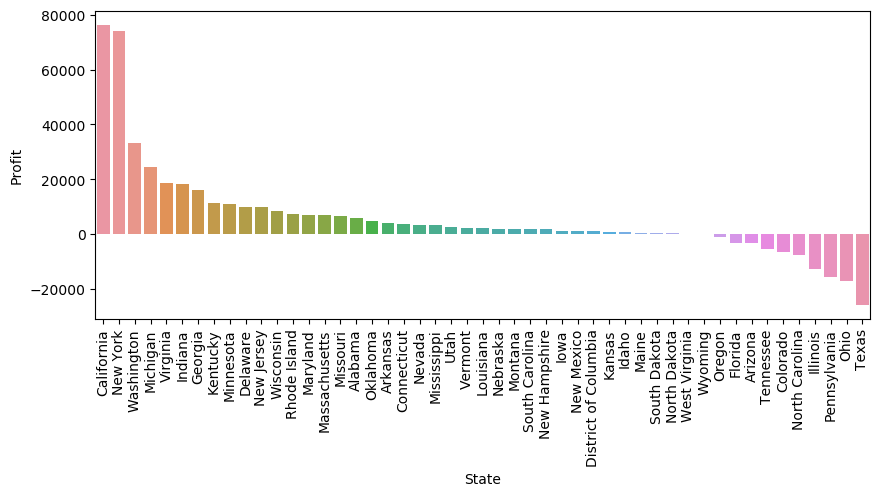

In [33]:
data_state= df.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(10,4))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

States with lowest profit are Texas & Ohio

### Region-wise Sales

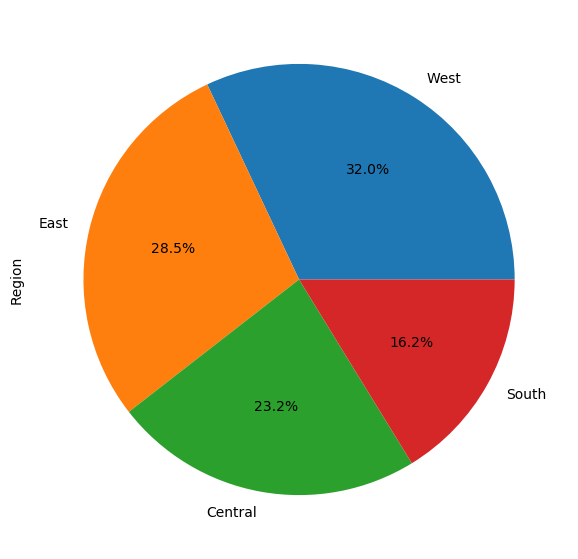

In [34]:
plt.figure(figsize=(7,7))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

There is highest sales in Western region & lowest sales in Southern regions

### Segment-wise Sales in each region

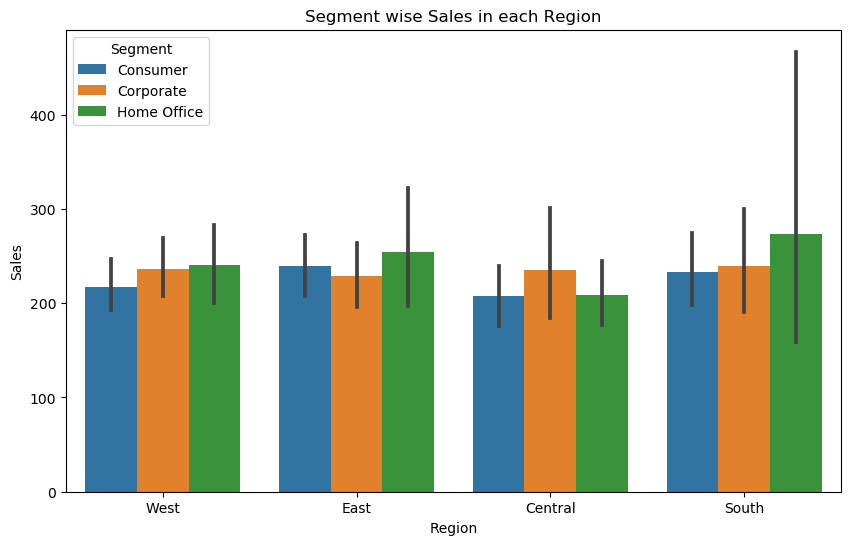

In [37]:
plt.figure(figsize=(10,6))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index)
plt.xlabel('Region',fontsize=10)
plt.show()

### Total profit/loss & sales in each region

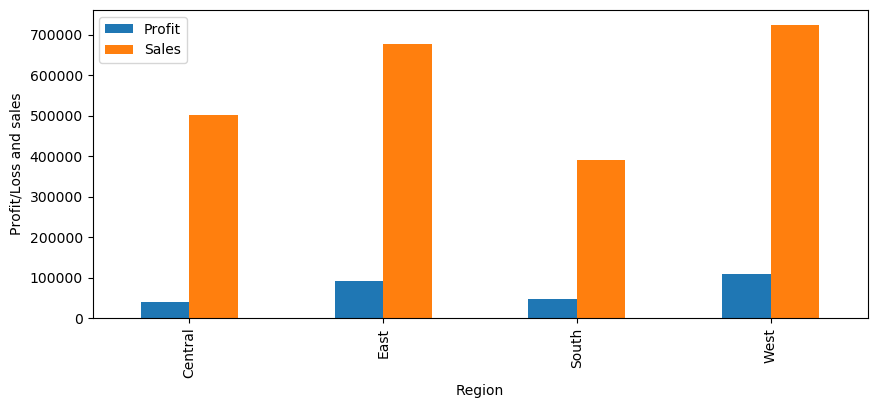

In [39]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(figsize=(10,4))
plt.ylabel('Profit/Loss and sales')
plt.show()

### Profit/Loss & Sales of different categories of products

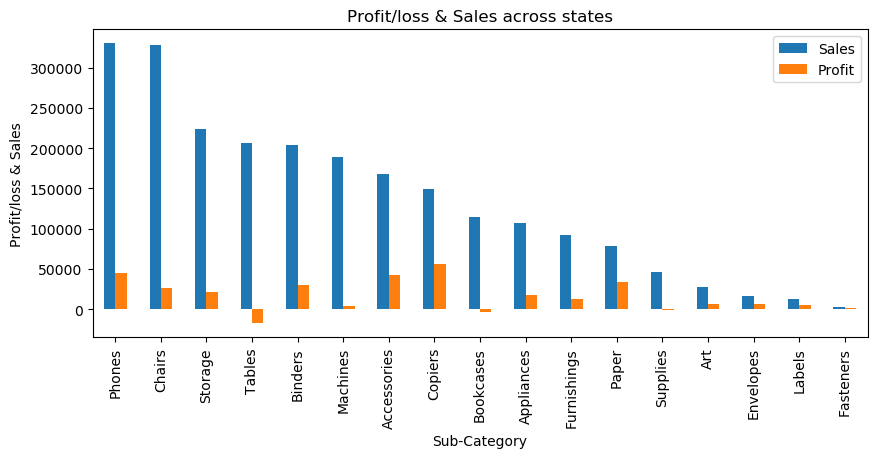

In [42]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(10,4))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

### Conclusion
Weak areas where Manager can work to make more profit.
* Machines and supplies are having less profit and are a loss making sub-category.
* Florida, Texas, Pennsylvania, Illinois, Arizona, Tennesse, Orgeon, Colorado and Ohio are the loss making states.
* Furnitures are not providing much profit margin.
* Profits and Sales are not Linear in most of the states.
* Central region needs to be given more attention.